In [50]:
import sys
sys.path.append("../../")

In [51]:
import numpy as np
import math as m
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from pyACC.Calculus.Function import MyFunction
from sympy import symbols, diff, integrate
plt.rcParams.update({
    "text.usetex": False, #mettere true quando ho latex
    "font.family": "serif",})

# Import pyACC logger
from pyACC.helpers import Logger

# Set the logger
print = Logger("pyACC.CosmologicalDistances")

# Import integration class
from pyACC.Cosmology.distances import Dc

In [52]:
# Implement the Hubble function
def hubble_function(z,omega_mat,omega_rad,w,H0):
    
    return H0*m.sqrt(omega_mat*(1+z)**3 + omega_rad*(1+z)**4 + (1 - omega_mat - omega_rad)*(1+z)**(3*(1+w)))

In [53]:
# Now use the function you've implemented to compute cosmological distances
# Use the class you've implemented
z=1
omega_mat = 0.319
omega_rad = 0
w = -1
H0=67
get_distances = Dc(hubble_function,z,omega_mat,omega_rad,w,H0)
#print(get_distances)

In [54]:
z_list = np.arange(0, 2, 0.01) + 0.01/2

comoving_distance =[]

for z_prime in z_list:
    comoving_distance.append(Dc(hubble_function,z_prime,omega_mat,omega_rad,w,H0))



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


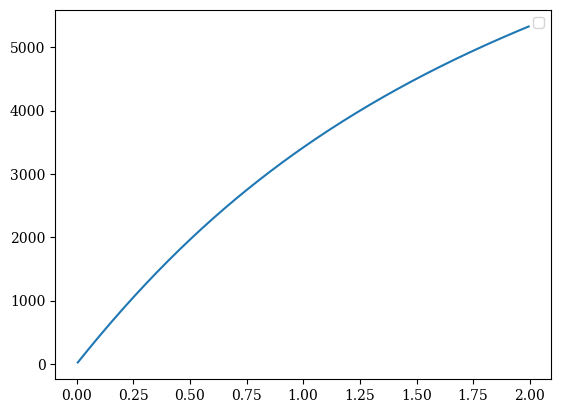

In [55]:
#create plot of comoving distance vs redshift
#make the plot
plt.plot(z_list, comoving_distance)
plt.legend()
plt.show()

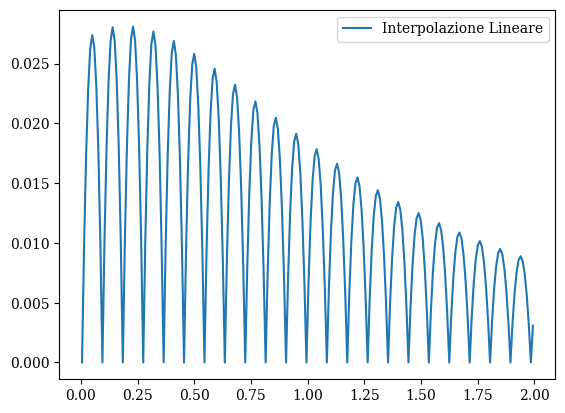

In [56]:
#Interpolation
f_interpol = interp1d(z_list,comoving_distance,kind='linear') #cubic ,fill_value='extrapolate'

#create new point for interpolation:

# Definition of new point to interpolate
x_new = np.arange(0, 2-0.01, 0.009) + 0.01/2 #np.linspace(1, 5, 100)

comoving_distance_new =[]

for z_prime in x_new:
    comoving_distance_new.append(Dc(hubble_function,z_prime,omega_mat,omega_rad,w,H0))


# Computation of interpolation's value
Dc_I = []
y_new =[]
Dc_I = f_interpol(x_new) #y_new

n=0
for x_prime in x_new:
    y_new.append(-Dc_I[n] + comoving_distance_new[n])
    n = n+1

#make the second derivative(I'll do the derivative respect to x(i.e. vs z))
#so i must take the function Dc and put all the values except for z(it is the variable) 
funz_for_second_der = MyFunction(Dc(hubble_function,z,omega_mat,omega_rad,w,H0))


#make the plot
plt.plot(x_new, y_new, label='Interpolazione Lineare')
plt.legend()
plt.show()



In [60]:
#faccio la stessa cosa ma utilizzando la classe in Function.py
funz_interp = MyFunction(f_interpol)
Dc_Iclass = funz_interp.interpolation_lin(x_new)

y_new_class = []

n=0
for x_prime in x_new:
    y_new_class.append(-Dc_Iclass[n] + comoving_distance_new[n])
    n = n+1

#make the plot
#plt.plot(x_new, y_new_class, label='Interpolazione Lineare')
#plt.legend()
#plt.show()

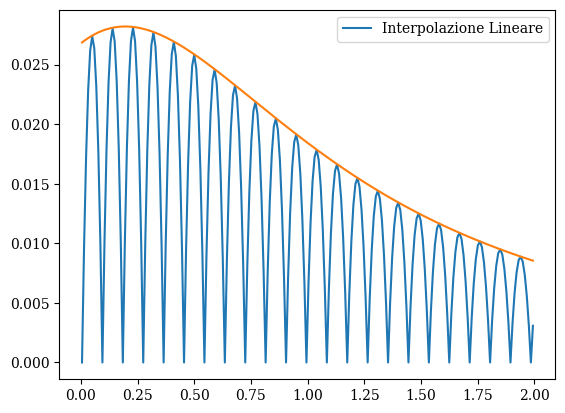

In [64]:
#code for second derivative of Dc
z, H0,omega_mat,omega_rad,w = symbols('z H0 omega_mat omega_rad w')
c = 3*10**5
#now i can do the real exercize:
func_Hubble = H0*(omega_mat*(1+z)**3 + omega_rad*(1+z)**4 + (1 - omega_mat - omega_rad)*(1+z)**(3*(1+w)))**0.5
#print(func_Hubble)
com_dist = integrate(c/func_Hubble,z)
#com_dist_prime = diff(com_dist,z)
com_dist_second = diff(com_dist,z,2)
#print(com_dist_second)

#make the plot of the second derivative with interpolation:
#to do it i must have the point(x,y) --> so i evaluate the second derivative in x_new

n=0
y_sec_der = []
for x_prime in x_new:
    y_sec_der.append(0.0001/8 * abs(com_dist_second.subs({z: x_prime,H0: 67,omega_mat: 0.319,omega_rad: 0,w: -1})))
    n = n+1
fig, ax = plt.subplots()
ax.plot(x_new, y_new_class, label='Interpolazione Lineare')
ax.plot(x_new, y_sec_der)
ax.legend()
plt.show()
